Data clenning

Data description

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

It's a great dataset for evaluating simple regression models.

id :a notation for a house

date: Date house was sold

price: Price is prediction target

bedrooms: Number of Bedrooms/House

bathrooms: Number of bathrooms/bedrooms

sqft_living: square footage of the home

sqft_lot: square footage of the lot

floors :Total floors (levels) in house

waterfront :House which has a view to a waterfront

view: Has been viewed

condition :How good the condition is Overall

grade: overall grade given to the housing unit, based on King County grading system

sqft_above :square footage of house apart from basement

sqft_basement: square footage of the basement

yr_built :Built Year

yr_renovated :Year when house was renovated

zipcode:zip code

lat: Latitude coordinate

long: Longitude coordinate

sqft_living15 :Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

sqft_lot15 :lotSize area in 2015(implies-- some renovations)

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [3]:
df.shape

(21613, 21)

In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
# I will drop the column id 
df = df.drop(['id'], axis = 1)

In [9]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Check the data distribution

# Visualizing with Seaborn 

In [10]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


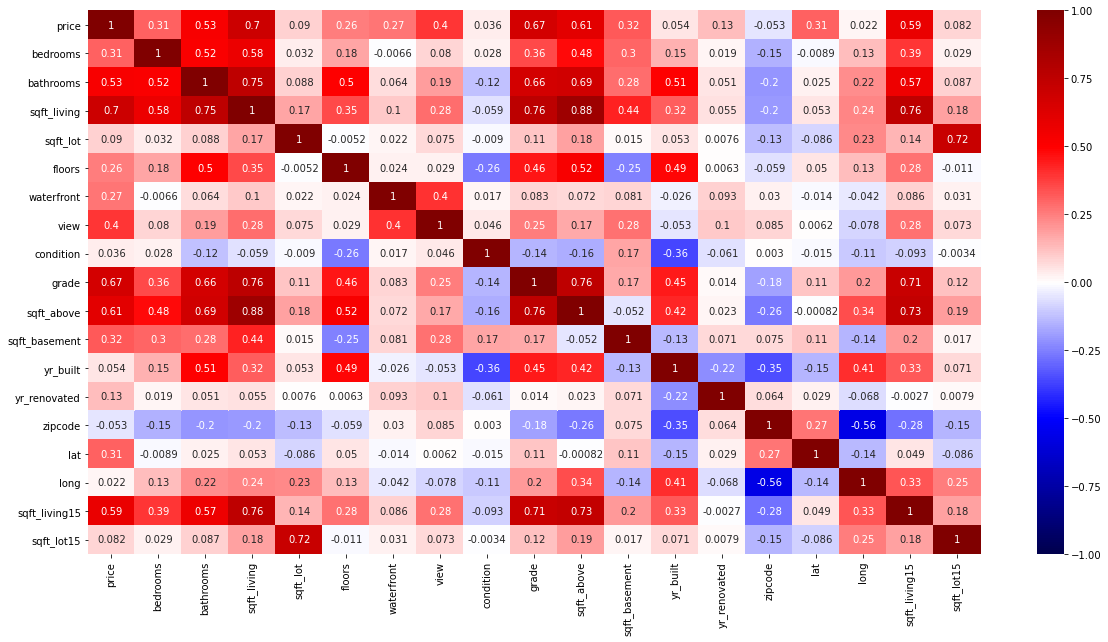

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [12]:
df.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

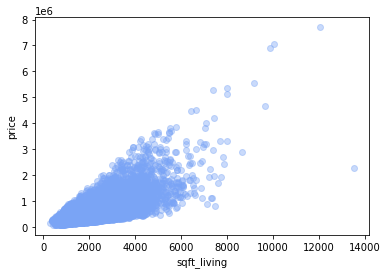

In [13]:
x = df.loc[:,"sqft_living"].values.reshape(-1,1)
y = df.loc[:,"price"].values.reshape(-1,1)

plt.scatter(x=x,y=y,c="#7aa4f5", alpha=0.4)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

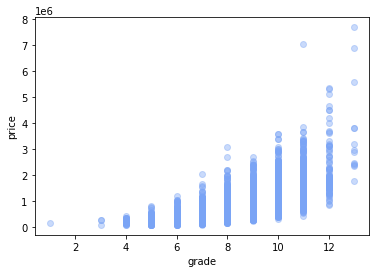

In [14]:
x = df.loc[:,"grade"].values.reshape(-1,1)
y = df.loc[:,"price"].values.reshape(-1,1)

plt.scatter(x=x,y=y,c="#7aa4f5", alpha=0.4)
plt.xlabel('grade')
plt.ylabel('price')
plt.show()

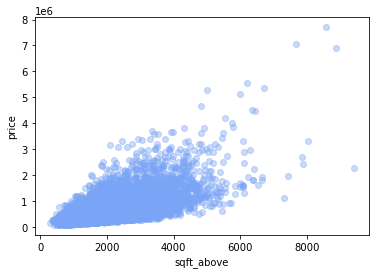

In [15]:
x = df.loc[:,"sqft_above"].values.reshape(-1,1)
y = df.loc[:,"price"].values.reshape(-1,1)

plt.scatter(x=x,y=y,c="#7aa4f5", alpha=0.4)
plt.xlabel('sqft_above')
plt.ylabel('price')
plt.show()

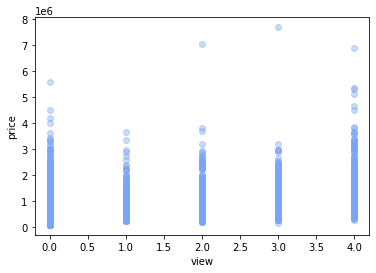

In [16]:
x = df.loc[:,"view"].values.reshape(-1,1)
y = df.loc[:,"price"].values.reshape(-1,1)

plt.scatter(x=x,y=y,c="#7aa4f5", alpha=0.4)
plt.xlabel('view')
plt.ylabel('price')
plt.show()

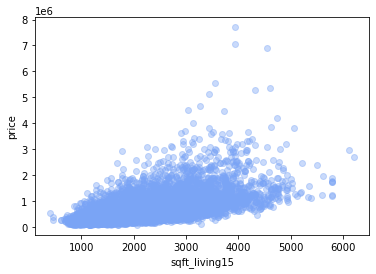

In [17]:
x = df.loc[:,"sqft_living15"].values.reshape(-1,1)
y = df.loc[:,"price"].values.reshape(-1,1)

plt.scatter(x=x,y=y,c="#7aa4f5", alpha=0.4)
plt.xlabel('sqft_living15')
plt.ylabel('price')
plt.show()

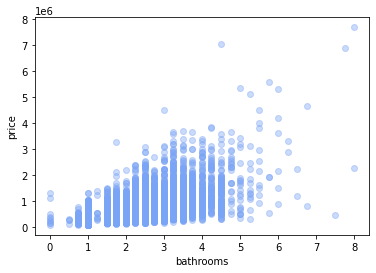

In [18]:
x = df.loc[:,"bathrooms"].values.reshape(-1,1)
y = df.loc[:,"price"].values.reshape(-1,1)

plt.scatter(x=x,y=y,c="#7aa4f5", alpha=0.4)
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.show()

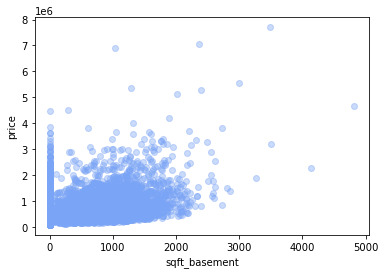

In [19]:
x = df.loc[:,"sqft_basement"].values.reshape(-1,1)
y = df.loc[:,"price"].values.reshape(-1,1)

plt.scatter(x=x,y=y,c="#7aa4f5", alpha=0.4)
plt.xlabel('sqft_basement')
plt.ylabel('price')
plt.show()


# Data Preparing

The date column is not numerical so I will split it into three columns which are year, month, day. Then I dropped the date column

In [20]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df = df.drop("date",axis=1)

df.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,...,2001,0,98053,47.6561,-122.005,4760,101930,2014,5,12
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,...,1995,0,98003,47.3097,-122.327,2238,6819,2014,6,27
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,...,1963,0,98198,47.4095,-122.315,1650,9711,2015,1,15
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,...,1960,0,98146,47.5123,-122.337,1780,8113,2015,4,15
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,...,2003,0,98038,47.3684,-122.031,2390,7570,2015,3,12


In [21]:
# I noticed when dropping year, month, day I get better R^2 score
df = df.drop(['year', 'month', 'day'], axis = 1)

/Users/mohammedalzabyedi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

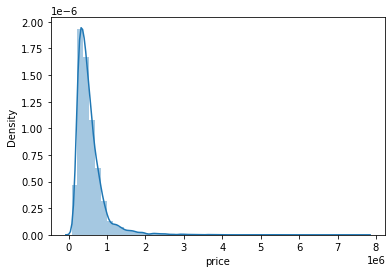

In [22]:
sns.distplot(df['price'])

In [23]:
len(df)*0.01

216.13

In [24]:
df = df.sort_values(['price'], ascending=False).iloc[216:]
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3281,1965000.0,5,3.75,3940,13738,1.5,0,3,4,9,3940,0,1951,0,98004,47.6203,-122.212,2370,13320
12577,1960000.0,4,4.00,4430,31353,2.0,0,0,3,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
12283,1959000.0,5,4.50,6200,23373,3.0,0,1,4,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
1152,1955000.0,4,2.75,3120,7898,1.0,1,4,4,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
9175,1955000.0,3,1.75,3330,12566,1.0,1,4,4,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560


/Users/mohammedalzabyedi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

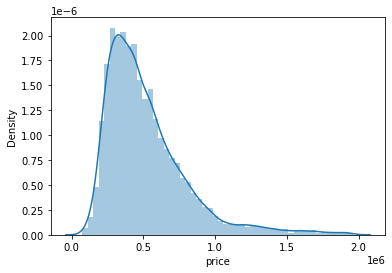

In [25]:
sns.distplot(df['price'])

As we can see the distribution of price is normal

In [26]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.139700e+04,21397.000000,21397.000000,21397.000000,2.139700e+04,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000
mean,5.181830e+05,3.360985,2.097537,2050.579707,1.499318e+04,1.490513,0.005328,0.216385,3.408282,7.626303,1766.311866,284.267841,1970.988316,82.267748,98078.079871,47.559461,-122.213655,1971.626677,12696.738842
std,2.847527e+05,0.923908,0.746989,861.483593,4.097853e+04,0.539242,0.072799,0.729494,0.649548,1.135392,791.713655,430.395339,29.307017,396.784910,53.471510,0.139047,0.141223,668.086144,27203.128770
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.200000e+05,3.000000,1.500000,1420.000000,5.026000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.469100,-122.329000,1480.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1900.000000,7.576000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1975.000000,0.000000,98065.000000,47.570700,-122.230000,1830.000000,7600.000000
75%,6.350000e+05,4.000000,2.500000,2520.000000,1.055000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,550.000000,1997.000000,0.000000,98118.000000,47.678400,-122.124000,2340.000000,10022.000000
max,1.965000e+06,33.000000,7.500000,7730.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7420.000000,3260.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000


# Correlation and Multicollinearity

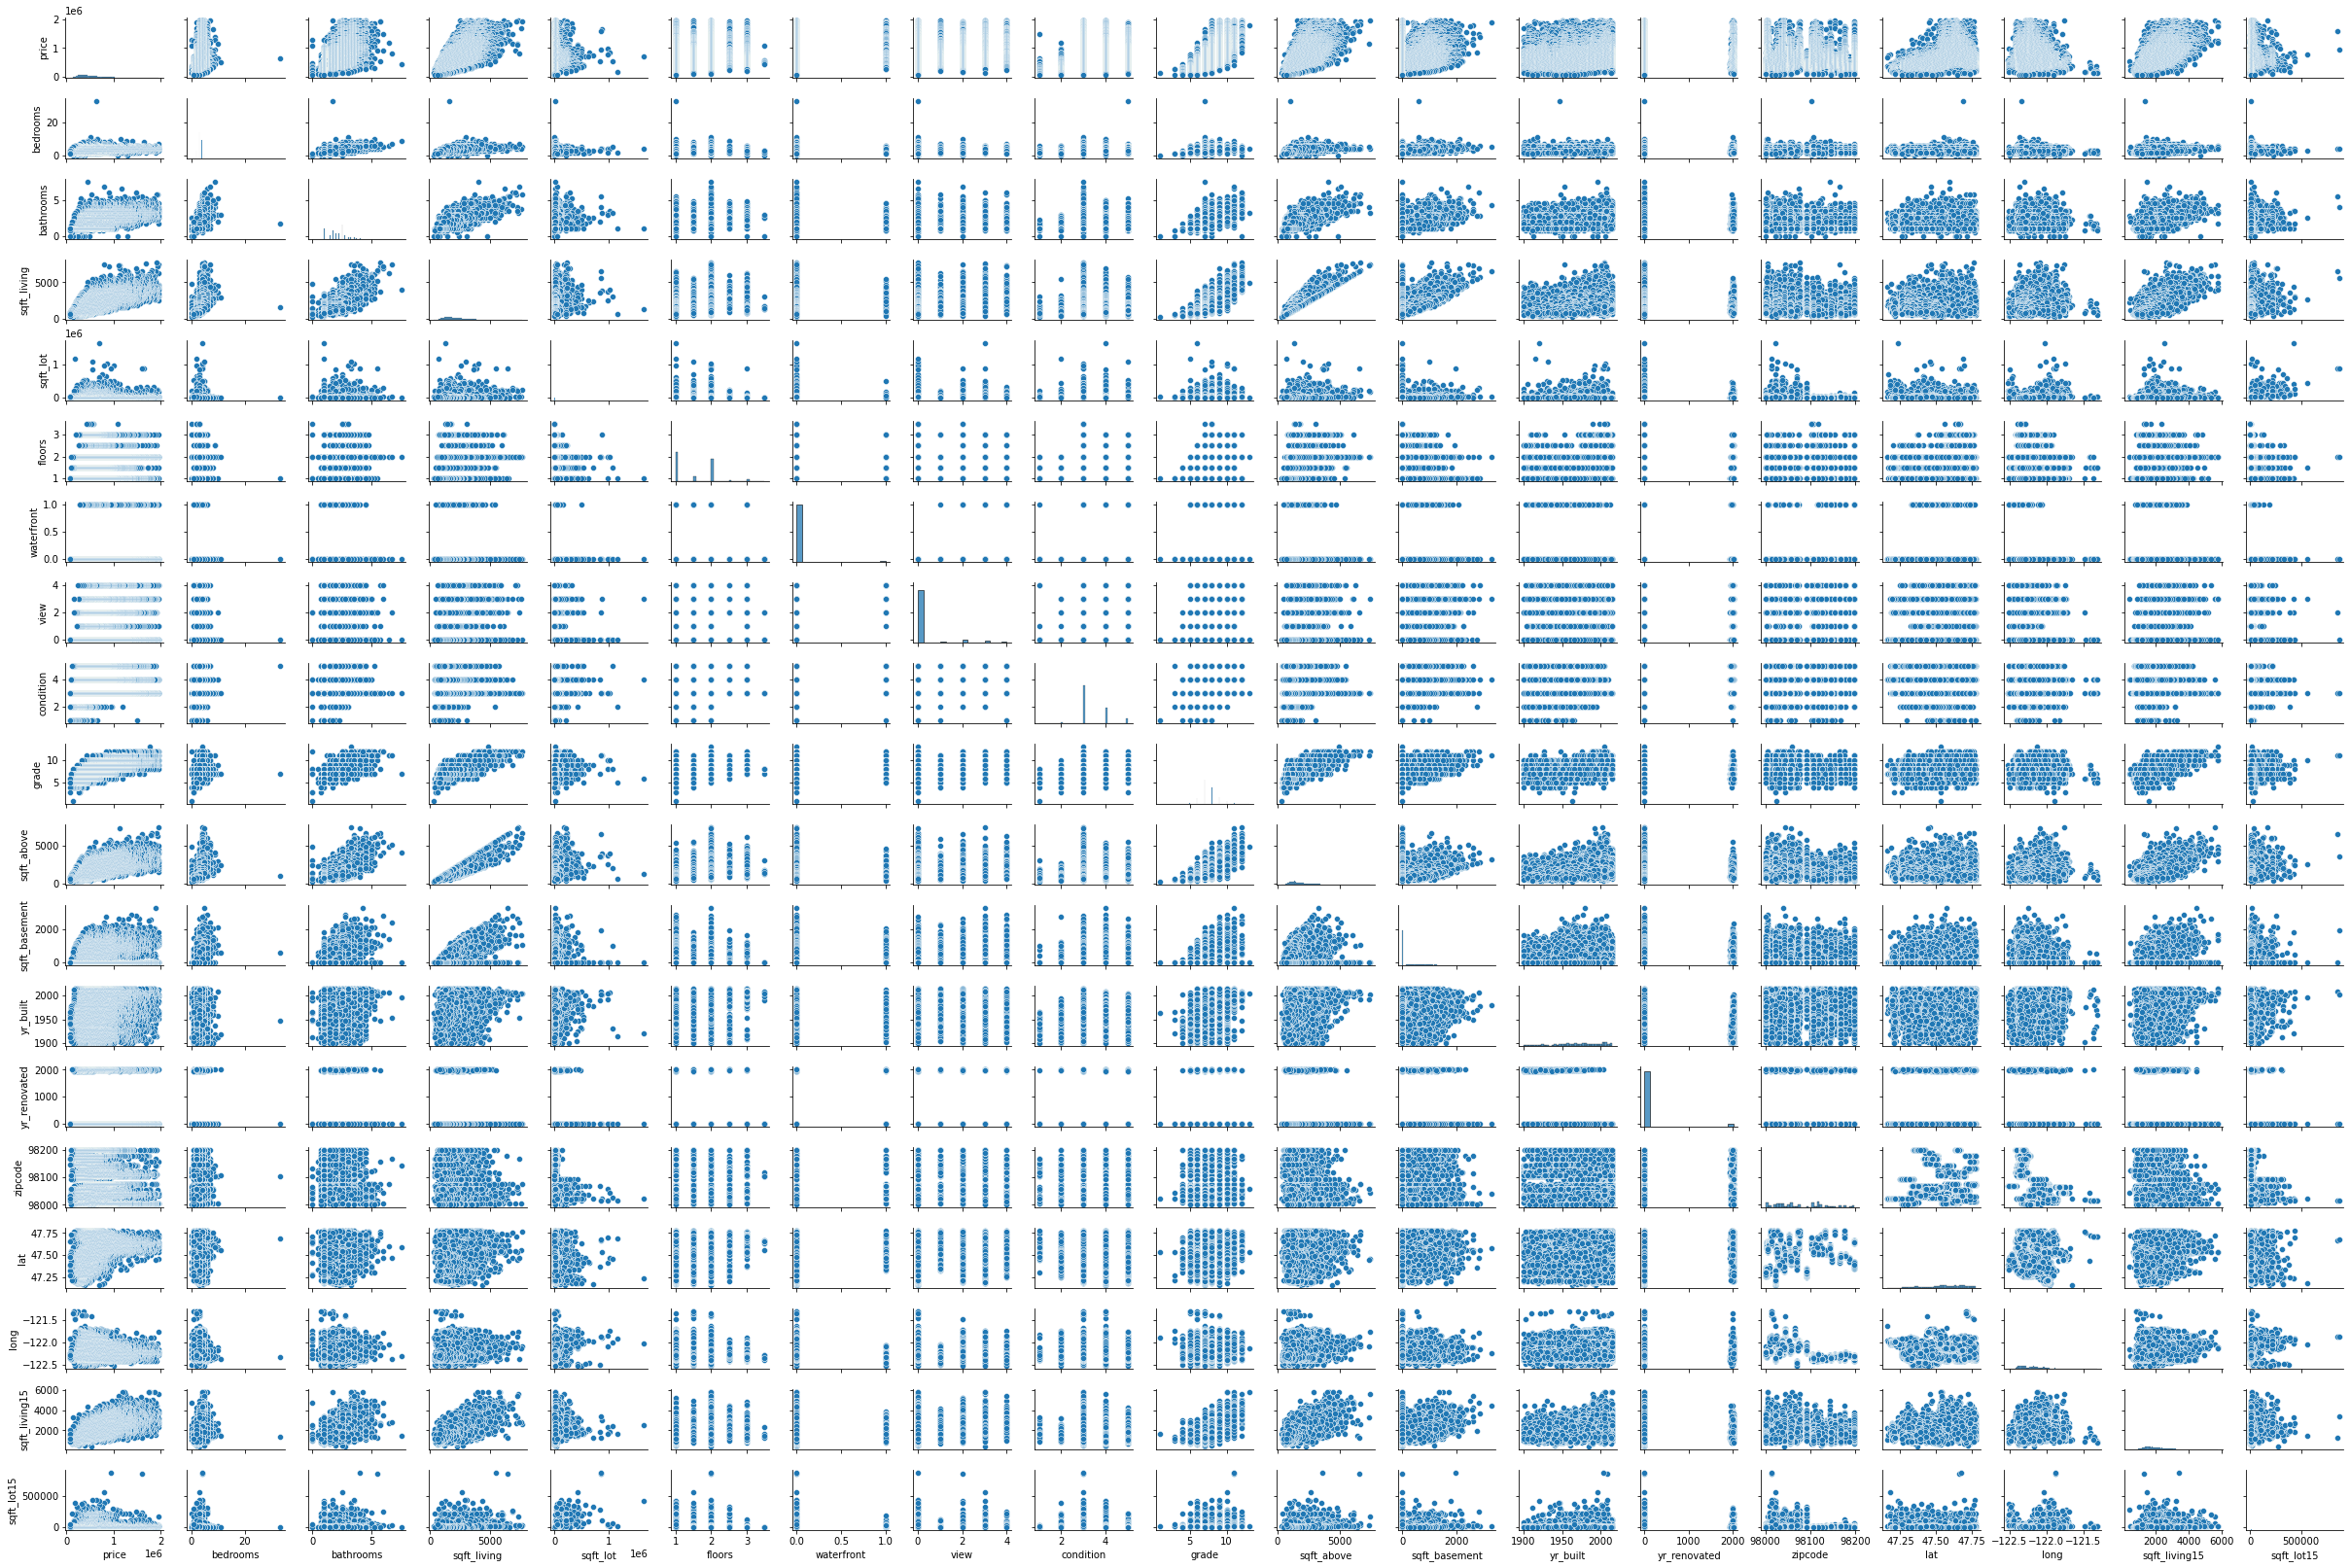

In [41]:
sns.pairplot(df, height=1.2, aspect=1.5);

# Linear Regression

In [100]:
from sklearn.model_selection import train_test_split

Model 1

In [101]:
x = df.loc[:,["sqft_living","grade","sqft_above","sqft_living15","bathrooms","view", "sqft_basement"]].values
y = df.loc[:,"price"].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [102]:
lr = LinearRegression()

# Fit
lr.fit(x_train,y_train)

# Predicted x_train & x_test 
train_predicted = lr.predict(x_train)
test_predicted = lr.predict(x_test)

# R^2 
print('R^2 train data: %.3f, R^2 test data: %.3f' % (r2_score(y_train,train_predicted),r2_score(y_test,test_predicted)))

R^2 train data: 0.568, R^2 test data: 0.558


In [103]:
lr_pf_rmse = np.sqrt(mean_squared_error(y_test, predicted, squared=False))
lr_pf_mae = np.sqrt(mean_absolute_error(y_test, predicted))

In [104]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, predicted, squared=False)))
print('MAE:', np.sqrt(mean_absolute_error(y_test, predicted)))

RMSE: 395.28421385687125
MAE: 330.71470490440703


Model 2

In [105]:
x = df.drop(['price'], axis = 1)
y = df.loc[:,"price"].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [106]:
lr  = LinearRegression()

# Fit
lr.fit(x_train,y_train)

# Predicted x_train & x_test 
train_predicted = lr.predict(x_train)
test_predicted = lr.predict(x_test)

# R^2 
print('R^2 train data: %.3f, R^2 test data: %.3f' % (r2_score(y_train,train_predicted),r2_score(y_test,test_predicted)))

R^2 train data: 0.718, R^2 test data: 0.702


In [107]:
lr_pf_rmse = np.sqrt(mean_squared_error(y_test, test_predicted, squared=False))
lr_pf_mae = np.sqrt(mean_absolute_error(y_test, test_predicted))

In [108]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, predicted, squared=False)))
print('MAE:', np.sqrt(mean_absolute_error(y_test, predicted)))

RMSE: 395.28421385687125
MAE: 330.71470490440703


Model 2 looks better than model 1

# Polynomial Regression

In [109]:
x = df.drop(['price'], axis = 1)
y = df.loc[:,"price"].values.reshape(-1,1)

from sklearn.preprocessing import PolynomialFeatures
polynomial_reg = PolynomialFeatures(degree = 2)

x_polynomial = polynomial_reg.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_polynomial, y, test_size = 0.2, random_state = 1)

In [110]:
polynomial_linear_reg = LinearRegression()

# Fit
polynomial_linear_reg.fit(x_train,y_train)

# Predicted x_train & x_test 
train_predicted = polynomial_linear_reg.predict(x_train)
test_predicted = polynomial_linear_reg.predict(x_test)

# R^2 
print('R^2 train data: %.3f, R^2 test data: %.3f' % (r2_score(y_train,train_predicted),r2_score(y_test,test_predicted)))

R^2 train data: 0.805, R^2 test data: 0.775


This model looks even better

In [111]:
rmse = np.sqrt(mean_squared_error(y_test, test_predicted, squared=False))
mae = np.sqrt(mean_absolute_error(y_test, test_predicted))
print('RMSE:', np.sqrt(mean_squared_error(y_test,test_predicted, squared=False)))
print('MAE:', np.sqrt(mean_absolute_error(y_test, test_predicted)))

RMSE: 368.5382295119428
MAE: 305.36202186351073


# Decision Tree

In [112]:
#x = #df.loc[:,"grade"].values.reshape(-1,1) 
x = df.drop(['price'], axis = 1)
y = df.loc[:,"price"].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [113]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()

# Fit
tree_reg.fit(x_train,y_train)

# Predicted x_train & x_test 
train_predicted = tree_reg.predict(x_train)
test_predicted = tree_reg.predict(x_test)

# R^2 
print('R^2 train data: %.3f, R^2 test data: %.3f' % (r2_score(y_train,train_predicted),r2_score(y_test,test_predicted)))

R^2 train data: 0.999, R^2 test data: 0.748


In [114]:
rmse = np.sqrt(mean_squared_error(y_test, test_predicted, squared=False))
mae = np.sqrt(mean_absolute_error(y_test, test_predicted))
print('RMSE:', np.sqrt(mean_squared_error(y_test, test_predicted, squared=False)))
print('MAE:', np.sqrt(mean_absolute_error(y_test,test_predicted)))

RMSE: 379.268614644285
MAE: 301.93691916393


# Random Forest

In [115]:
x = df.drop(['price'], axis = 1)
y = df.loc[:,"price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [116]:
from sklearn.ensemble import RandomForestRegressor

r_forest = RandomForestRegressor(n_estimators = 100, random_state = 1)
r_forest.fit(x_train,y_train)

# Predicted x_train & x_test 

train_predicted = r_forest.predict(x_train)
test_predicted = r_forest.predict(x_test)





print('R^2 train data: %.3f, R^2 test data: %.3f' % (r2_score(y_train,train_predicted),r2_score(y_test,test_predicted)))

R^2 train data: 0.982, R^2 test data: 0.866


In [117]:
rmse = np.sqrt(mean_squared_error(y_test, test_predicted, squared=False))
mae = np.sqrt(mean_absolute_error(y_test, test_predicted))
print('RMSE:', np.sqrt(mean_squared_error(y_test, test_predicted, squared=False)))
print('MAE:', np.sqrt(mean_absolute_error(y_test, test_predicted)))

RMSE: 323.7482705433712
MAE: 255.609284125417
